In [1]:
import magma as m
from magma.bitutils import int2seq
from magma.primitives import DefineRegister

To implement a counter we can use the `DefineRegister` primitive and the `+` operator for `m.UInt` instances.

In [2]:
Reg4 = DefineRegister(4, T=m.UInt)

class Counter4(m.Circuit):
    name = "Counter4"
    IO = ["count", m.Out(m.UInt(4))] + m.ClockInterface()
    @classmethod
    def definition(io):
        reg4 = Reg4()
        count = reg4.out + int2seq(1, 4)
        m.wire(count, getattr(reg4, "in"))
        m.wire(reg4.out, io.count)
        m.wireclock(io, reg4)

We use the Python simulator to generate a waveform of our circuit.
* `step` steps the clock
* `evaluate` evaluates the circuit
* `get_value` returns the value of the circuit ports

In [3]:
from magma.python_simulator import PythonSimulator
from magma.scope import Scope

simulator = PythonSimulator(Counter4)
scope = Scope()
waveforms = []
for i in range(18):
    for j in range(2):
        simulator.step()
        simulator.evaluate()
        clk = simulator.get_value(Counter4.CLK, scope)
        O = simulator.get_value(Counter4.count, scope)
        waveforms.append(O + [clk])

magma provides a helper function to plot waveform diagrams

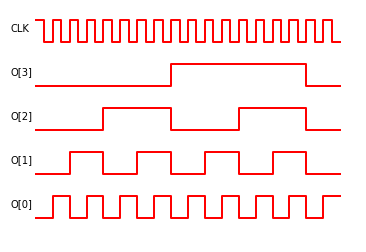

In [4]:
from magma.waveform import waveform

waveform(waveforms, ["O[0]", "O[1]", "O[2]", "O[3]", "CLK"])

We can also inspect the generated verilog for our counter.

In [5]:
m.compile("build/counter", Counter4, include_coreir=True)

compiling Counter4


In [6]:
with open("build/counter.v", "r") as counter_verilog:
    print(counter_verilog.read())

`include "/Users/lenny/repos/magma/magma/backend/coreir_prims.v"
module Counter4 (output [3:0] count, input  CLK);
wire [3:0] inst0_out;
wire [3:0] inst1_out;
coreir_reg_P #(.width(4)) inst0 (.in(inst1_out), .clk(CLK), .out(inst0_out));
coreir_add #(.width(4)) inst1 (.in0(inst0_out), .in1({1'b0,1'b0,1'b0,1'b1}), .out(inst1_out));
assign count = inst0_out;
endmodule


